In [46]:
import pandas as pd
dataset = pd.read_csv("flowdata.csv")
dataset.head()

,Source,Destination,Protocol,Src_port,Dest_port,Flow_count,Flow_size,pkt_size_of_first_flow,Flow_duration,first_flow_inter_arrival_time
0,0.0.0.0,255.255.255.255,DHCP,-1,-1,279,95418,342,3335.924975,0.005128
1,1.1.247.102,103.119.242.114,TCP,-1,-1,5,330,66,293.814945,0.135032
2,1.1.247.102,103.119.242.114,TCP,4001,4001,1,66,66,254.990643,0.747853
3,1.156.246.187,103.119.242.114,UDP,37186,32478,1,331,331,1821.708214,0.227403
4,1.164.136.162,103.119.242.114,UDP,7536,32478,1,143,143,950.648788,3.748469


In [47]:
dataset["pkt_size_to_flow_size"] = dataset["pkt_size_of_first_flow"]/dataset["Flow_size"]
dataset.head()

,Source,Destination,Protocol,Src_port,Dest_port,Flow_count,Flow_size,pkt_size_of_first_flow,Flow_duration,first_flow_inter_arrival_time,pkt_size_to_flow_size
0,0.0.0.0,255.255.255.255,DHCP,-1,-1,279,95418,342,3335.924975,0.005128,0.003584
1,1.1.247.102,103.119.242.114,TCP,-1,-1,5,330,66,293.814945,0.135032,0.200000
2,1.1.247.102,103.119.242.114,TCP,4001,4001,1,66,66,254.990643,0.747853,1.000000
3,1.156.246.187,103.119.242.114,UDP,37186,32478,1,331,331,1821.708214,0.227403,1.000000
4,1.164.136.162,103.119.242.114,UDP,7536,32478,1,143,143,950.648788,3.748469,1.000000


In [48]:
dataset.describe()

,Src_port,Dest_port,Flow_count,Flow_size,pkt_size_of_first_flow,Flow_duration,first_flow_inter_arrival_time,pkt_size_to_flow_size
count,11682.0000,11682.000000,11682.000000,1.168200e+04,11682.000000,11682.000000,11682.000000,11682.000000
mean,34412.4673,18298.462934,39.891286,3.830251e+04,162.745506,998.263852,0.286084,0.626056
std,26127.8508,23457.505149,273.369332,3.903940e+05,184.233624,1102.006340,0.549282,0.412450
min,-1.0000,-1.000000,1.000000,4.200000e+01,42.000000,0.000000,0.000000,0.000005
25%,80.0000,80.000000,1.000000,1.320000e+02,66.000000,20.832279,0.007723,0.234043
50%,50637.0000,2793.000000,1.000000,3.050000e+02,66.000000,484.671246,0.092254,1.000000
75%,56383.7500,50142.000000,5.000000,3.360000e+02,305.000000,1918.468186,0.308437,1.000000
max,65521.0000,65340.000000,8969.000000,1.302493e+07,1514.000000,3342.033433,6.760540,1.000000


In [49]:
flow_size_mean = 3.830251e+04
flow_duration_mean = 998.263852	
valid_ports = [1074, 1392, 49160]
pkt_to_flow_mean = 0.626056
filtered = dataset[(dataset.Flow_size<flow_size_mean) & (dataset.Flow_duration < flow_duration_mean) & (dataset.Src_port.isin(valid_ports)) & (dataset.pkt_size_of_first_flow > pkt_to_flow_mean)]
len(filtered)

103

In [50]:
uniqIPs = pd.unique(filtered.Source)
len(uniqIPs)

1

In [51]:
import numpy as np
dataset["isSelfish"] = np.where(dataset.Source.isin(uniqIPs), 1, 0)
dataset.to_csv("flowWithSelfish.csv")
dataset.head()

,Source,Destination,Protocol,Src_port,Dest_port,Flow_count,Flow_size,pkt_size_of_first_flow,Flow_duration,first_flow_inter_arrival_time,pkt_size_to_flow_size,isSelfish
0,0.0.0.0,255.255.255.255,DHCP,-1,-1,279,95418,342,3335.924975,0.005128,0.003584,0
1,1.1.247.102,103.119.242.114,TCP,-1,-1,5,330,66,293.814945,0.135032,0.200000,0
2,1.1.247.102,103.119.242.114,TCP,4001,4001,1,66,66,254.990643,0.747853,1.000000,0
3,1.156.246.187,103.119.242.114,UDP,37186,32478,1,331,331,1821.708214,0.227403,1.000000,0
4,1.164.136.162,103.119.242.114,UDP,7536,32478,1,143,143,950.648788,3.748469,1.000000,0


<AxesSubplot:xlabel='isSelfish', ylabel='count'>

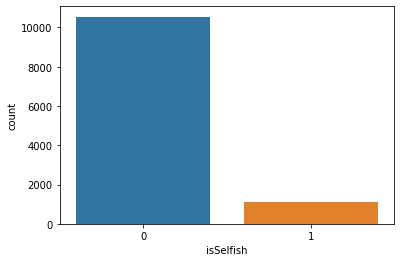

In [52]:
import seaborn as sns
sns.countplot(x="isSelfish", data=dataset)

In [53]:
selfishCount = len(dataset[(dataset.isSelfish == 1)])
print("Selfish:" , selfishCount, "\nNot Selfish:", len(dataset)-selfishCount)

Selfish: 1133 
Not Selfish: 10549
